[*********************100%***********************]  8 of 8 completed


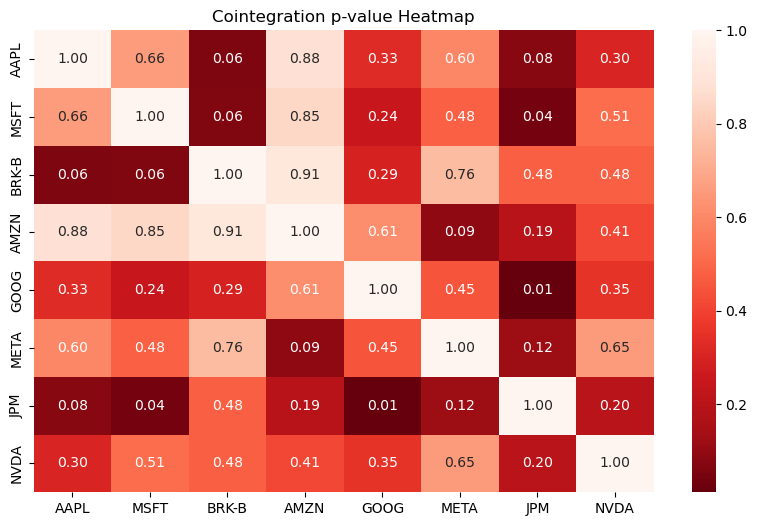

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import coint
import itertools

tickers = ['AAPL', 'MSFT', 'BRK-B', 'AMZN', 'GOOG', 'META', 'JPM', 'NVDA']
start_date = '2020-01-01'
end_date = '2024-12-31'

data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Close']
data.dropna(inplace=True)

# Initialize p-value matrix
pval_matrix = pd.DataFrame(np.ones((len(tickers), len(tickers))), columns=tickers, index=tickers)

for (i, j) in itertools.combinations(tickers, 2):
    _, pvalue, _ = coint(data[i], data[j])
    pval_matrix.loc[i, j] = pvalue
    pval_matrix.loc[j, i] = pvalue

# Plot heatmap, darker red equates toa lower p value, which is desired
plt.figure(figsize=(10, 6))
sns.heatmap(pval_matrix, annot=True, cmap='Reds_r', fmt=".2f")
plt.title("Cointegration p-value Heatmap")
plt.show()

